# Objective
The goal of this task is to clean, standardize, and merge two supplier datasets (supplier_data_1.xlsx and supplier_data_2.xlsx) into a single consolidated dataset (inventory_dataset), ensuring consistent structure and data quality for further analysis

## 1. Importing Libraries

Before starting, we need to install and import all the necessary libraries for data processing and cleaning.
Importing the necessary libraries for data processing and cleaning:
1. **`import pandas as pd`**  # For data manipulation and analysis.
2. **`import re`**  # For regular expressions (text processing).
3. **`import matplotlib.pyplot as plt`**  # For data visualization.
4. **`import seaborn as sns`**  # For advanced data visualization.

In [1]:
# Importing the necessary libraries for data processing and cleaning
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Files
We load the datasets from both suppliers using `pandas.read_excel()`. 
This step is crucial to inspect the structure, column names, and data types of the datasets, which helps identify inconsistencies and plan the cleaning process.

In [2]:
#loading required datasets
supplier_df1 = pd.read_excel('supplier_data_1.xlsx')
supplier_df2 = pd.read_excel('supplier_data_2.xlsx')

# 3. Data Inspection
This allows an initial visual check of the data (column names, types, and obvious missing values or formatting issues).
1. We print the DataFrames to visually inspect the data.
2. Column names in supplier_df1 are renamed for consistency.(Translating German column name to English for data consistency: To standardize column names into a consistent format (lowercase with underscores), which makes data handling easier later.Columns were renamed to descriptive names to clearly understand each field)
3. The info() method is used to display the structure and data types of both datasets.


In [3]:
# Print Supplier 1 DataFrame for initial inspection
print("Supplier 1 Data:")
print(supplier_df1)

# Renaming columns for consistency
supplier_df1.columns = [
    'quality_choice', 'grade', 'thickness_mm_in_decimal', 'width_mm', 'length_mm', 
    'weight_kg', 'cluster', 'si_content', 'mn_content', 'p_content', 
    's_content', 'cr_content', 'ni_content', 'mo_content', 'v_content', 
    'cu_content', 'nb_content', 'ti_content', 'al_content', 'b_content', 
    'yield_strength', 'tensile_strength', 'elongation'
]

# Display basic info about the dataset
supplier_df1.info()

Supplier 1 Data:
   Werksgüte Bestellgütentext  Nenndicke NNN.NN mm mit Dezimalpunkt   Breite  \
0      G2UB5          SZBS800                                   320    856.0   
1      G2UJ5          SZBS800                                   339    918.0   
2      C3318        LICRO 500                                   452  1,839.0   
3      C3U15    S380MC mod. 4                                   532  1,160.0   
4      G3UB5          SZBE800                                   451    727.2   
..       ...              ...                                   ...      ...   
81       NaN    HR660Y760T-CP                                   247  1,379.0   
82     G2UB5              NaN                                   295  1,380.2   
83     G2UB5              NaN                                   246  1,379.0   
84       NaN          42CrMo4                                   302  1,181.0   
85     C3U15    S380MC mod. 4                                   532  1,160.0   

    Länge  Gewicht (kg

In [4]:
# Print Supplier 2 DataFrame for initial inspection
print("\nSupplier 2 Data:")
print(supplier_df2)

# Check the structure and datatypes of Supplier 2
supplier_df2.info()


Supplier 2 Data:
    PRODUCT_TYPE  ORDER_ID            SITE MATERIAL_NAME  MATERIAL_NUMBER  \
0          SHEET    436765  1 company gmbh        S235JR           1.0038   
1          SHEET    436754  1 company gmbh        S355MC           1.0976   
2          SHEET    436755  1 company gmbh           NaN           1.0976   
3          SHEET    436757  1 company gmbh        S355MC           1.0976   
4          SHEET    436758  1 company gmbh        S355MC           1.0976   
..           ...       ...             ...           ...              ...   
131   COIL_STRIP    436737  1 company gmbh           NaN           1.0873   
132        SHEET    436765  1 company gmbh        S235JR           1.0038   
133   COIL_STRIP    436283  1 company gmbh       CR180BH              NaN   
134         SHET    436626  1 company gmbh           NaN           1.0045   
135          NaN    436521  1 company gmbh        S23SJR           1.0038   

    MATERIAL_QUALITY_NORM  SURFACE_COATING  \
0          

# 4. Data Cleaning and Preprocessing

This section focuses on cleaning and preprocessing the datasets to ensure consistency, handle missing values, and prepare the data for analysis.

1. **Checking and Converting Data Types:**
To ensure numeric fields are actually numeric, we check and convert data types as needed. Some numeric fields (e.g., `width_mm`) may contain commas (e.g., `1,000`), which need to be removed for proper conversion.
2. **Removing Unwanted Data:**
Some numeric columns may contain text artifacts due to manual data entry or corruption. We use regex to detect and retain only numeric values, replacing invalid entries with None.
3. **Standardizing and Filling Missing Values:**
For non-numeric fields (e.g., `quality_choice`, `grade`, `cluster`), missing values are replaced with 'NA'.
For numeric fields, missing values are filled with 0.0 to simplify future analysis.
4. **Standardizing Text Fields:**
In supplier 2:  Standardizing `PRODUCT_TYPE` by replacing 'SHET' with 'SHEET' and 'COILS_STRIP' with 'COIL_STRIP. Standardizing Date Format in `VALID_UNTIL` by converting dates in dd/mm/yyyy hh:mm format to yyyy-mm-dd hh:mm.
5. **Removing duplicates:**
Remove full duplicate rows and check for partial duplicates based on key column.


In [5]:
# Fill missing string columns with 'NA' and strip any unnecessary spaces
supplier_df1['quality_choice'] = supplier_df1['quality_choice'].fillna('NA').str.strip()
supplier_df1['grade'] = supplier_df1['grade'].fillna('NA').str.strip()
supplier_df1['cluster'] = supplier_df1['cluster'].fillna('NA').str.strip()

In [6]:
# List of numeric columns to clean and fill with 0.0
columns_to_clean_2 = [
    'si_content', 'mn_content', 'p_content', 's_content', 'cr_content', 
    'ni_content', 'mo_content', 'v_content', 'cu_content', 'nb_content', 
    'ti_content', 'al_content', 'b_content', 'yield_strength', 
    'tensile_strength', 'elongation'
]

# Fill missing numeric columns with 0.0
supplier_df1[columns_to_clean_2] = supplier_df1[columns_to_clean_2].fillna(0.0)

In [7]:
# Regex to clean non-numeric characters including embedded numbers
def clean_value(value):
    if pd.isna(value):  
        return value
    if re.search(r'^\d+(\.\d+)?', str(value)):
        return value  # Return numeric values as they are
    return None  # Return None for non-numeric values

# Apply the cleaning function to the relevant columns
columns_to_clean = [
    'si_content', 'mn_content', 'p_content', 's_content', 'cr_content', 
    'ni_content', 'mo_content'
]

# Apply the cleaning function and fill with 0.0
supplier_df1[columns_to_clean] = supplier_df1[columns_to_clean].applymap(clean_value)
supplier_df1[columns_to_clean] = supplier_df1[columns_to_clean].fillna(0.0)

# Verify the changes
print("Cleaned columns:")
print(supplier_df1[columns_to_clean].head(20))

Cleaned columns:
   si_content mn_content p_content s_content cr_content ni_content mo_content
0         0.0        0.0       0.0       0.0        0.0        0.0        0.0
1         0.0        0.0       0.0       0.0        0.0        0.0        0.0
2      0.2540     1.2780    0.0080    0.0010     0.4340     0.0350     0.0090
3      0.2250     1.0630    0.0100    0.0020     0.0480     0.0300     0.0060
4         0.0        0.0       0.0       0.0        0.0        0.0        0.0
5         0.0        0.0       0.0       0.0        0.0        0.0        0.0
6          10        0.0       610       0.0        0.0        0.0        0.0
7         0.0        0.0       0.0       0.0        0.0        0.0        0.0
8      0.2330     1.0290    0.0090    0.0040     0.0600     0.0630     0.0180
9      0.1190     0.7440    0.0130    0.0040     0.0480     0.0390     0.0050
10          0          0         0         0          0          0          0
11     0.2650     1.0490    0.0140    0.0030   

C:\Users\HP\AppData\Local\Temp\ipykernel_25008\173736215.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  supplier_df1[columns_to_clean] = supplier_df1[columns_to_clean].applymap(clean_value)


In [8]:
# Check if there are any missing values remaining
missing_values_supplier1 = supplier_df1.isna().sum()
print(f"Missing values in Supplier 1 after cleaning: \n{missing_values_supplier1}")

Missing values in Supplier 1 after cleaning: 
quality_choice             0
grade                      0
thickness_mm_in_decimal    0
width_mm                   0
length_mm                  0
weight_kg                  0
cluster                    0
si_content                 0
mn_content                 0
p_content                  0
s_content                  0
cr_content                 0
ni_content                 0
mo_content                 0
v_content                  0
cu_content                 0
nb_content                 0
ti_content                 0
al_content                 0
b_content                  0
yield_strength             0
tensile_strength           0
elongation                 0
dtype: int64


In [9]:
# Check for full duplicate rows in Supplier 1
duplicates_supplier1 = supplier_df1[supplier_df1.duplicated(keep=False)]
print(f"Total Full Duplicate Rows in Supplier 1: {duplicates_supplier1.shape[0]}")

Total Full Duplicate Rows in Supplier 1: 6


In [10]:
# Key columns for partial duplicates in Supplier 1
key_columns_supplier1 = ['quality_choice', 'grade', 'thickness_mm_in_decimal', 'width_mm', 'length_mm']

# Check for partial duplicates
partial_duplicates_supplier1 = supplier_df1[supplier_df1.duplicated(subset=key_columns_supplier1, keep=False)]
print(f"Partial Duplicate Rows (based on key columns): {len(partial_duplicates_supplier1)}")

Partial Duplicate Rows (based on key columns): 6


In [11]:
# Remove true duplicates and keep the first occurrence
supplier_df1_cleaned = supplier_df1.drop_duplicates(keep='first')
duplicate_count_supplier1 = supplier_df1_cleaned.duplicated().sum()

print(f"Total Duplicate Rows in Supplier 1 After Cleanup: {duplicate_count_supplier1}")

Total Duplicate Rows in Supplier 1 After Cleanup: 0


In [12]:
# Convert necessary columns to appropriate datatypes
supplier_df2['WIDTH_MM'] = supplier_df2['WIDTH_MM'].astype(float)
supplier_df2['MASS_MIN_KG'] = supplier_df2['MASS_MIN_KG'].astype(float)

# Verify the datatypes after conversion
supplier_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PRODUCT_TYPE             118 non-null    object 
 1   ORDER_ID                 136 non-null    int64  
 2   SITE                     136 non-null    object 
 3   MATERIAL_NAME            116 non-null    object 
 4   MATERIAL_NUMBER          91 non-null     float64
 5   MATERIAL_QUALITY_NORM    119 non-null    object 
 6   SURFACE_COATING          0 non-null      float64
 7   DEFECT_NOTES             116 non-null    object 
 8   NOMINAL_THICKNESS_MM     136 non-null    float64
 9   WIDTH_MM                 136 non-null    float64
 10  LENGTH_MM                55 non-null     float64
 11  HEIGHT_MM                0 non-null      float64
 12  MASS_MIN_KG              136 non-null    float64
 13  NUMBER_OF_COILS          0 non-null      float64
 14  DELIVERY_EARLIEST        0

In [13]:
# List of string columns to fill with 'NA'
columns_to_fill_supplier2 = ['MATERIAL_QUALITY_NORM', 'INCO_TERM', 'DEFECT_NOTES', 'MATERIAL_NAME', 'PRODUCT_TYPE']
supplier_df2[columns_to_fill_supplier2] = supplier_df2[columns_to_fill_supplier2].fillna('NA')

# Verify the changes
print("Missing values in Supplier 2 (String columns):")
print(supplier_df2[columns_to_fill_supplier2].isna().sum())

Missing values in Supplier 2 (String columns):
MATERIAL_QUALITY_NORM    0
INCO_TERM                0
DEFECT_NOTES             0
MATERIAL_NAME            0
PRODUCT_TYPE             0
dtype: int64


In [14]:
# List of numeric columns to fill with 0.0
numeric_columns_to_fill_supplier2 = [
    'NUMBER_OF_COILS', 'MASS_MIN_KG', 'SURFACE_COATING', 'HEIGHT_MM', 
    'DELIVERY_EARLIEST', 'DELIVERY_LATEST', 'CO2_PER_TON_MAX_KG', 
    'LENGTH_MM', 'BUY_NOW_EUR_PER_TON', 'MIN/MAX_BID_EUR_PER_TON', 
    'MATERIAL_NUMBER'
]
supplier_df2[numeric_columns_to_fill_supplier2] = supplier_df2[numeric_columns_to_fill_supplier2].fillna(0.0)

# Verify the changes
print("Missing values in Supplier 2 (Numeric columns):")
print(supplier_df2[numeric_columns_to_fill_supplier2].isna().sum())

Missing values in Supplier 2 (Numeric columns):
NUMBER_OF_COILS            0
MASS_MIN_KG                0
SURFACE_COATING            0
HEIGHT_MM                  0
DELIVERY_EARLIEST          0
DELIVERY_LATEST            0
CO2_PER_TON_MAX_KG         0
LENGTH_MM                  0
BUY_NOW_EUR_PER_TON        0
MIN/MAX_BID_EUR_PER_TON    0
MATERIAL_NUMBER            0
dtype: int64


In [15]:
# Standardize 'product_type' by replacing 'SHET' with 'SHEET' and 'COILS_STRIP' with 'COIL_STRIP'
supplier_df2['PRODUCT_TYPE'] = supplier_df2['PRODUCT_TYPE'].replace({'SHET': 'SHEET', 'COILS_STRIP': 'COIL_STRIP'})

# Check to see if the replacements were successful
print(supplier_df2[['PRODUCT_TYPE']].tail())

    PRODUCT_TYPE
131   COIL_STRIP
132        SHEET
133   COIL_STRIP
134        SHEET
135           NA


In [16]:
# Regex to detect "dd/mm/yyyy hh:mm" format (day/month/year hour:minute)
pattern = re.compile(r'^\d{2}/\d{2}/\d{4} \d{2}:\d{2}$')

# Function to convert only rows matching "dd/mm/yyyy hh:mm" to "yyyy-mm-dd hh:mm"
def convert_if_needed(date_str):
    if pd.isna(date_str):  # Handle NaN values if they exist
        return date_str
    if pattern.match(date_str):
        return pd.to_datetime(date_str, format="%d/%m/%Y %H:%M").strftime("%Y-%m-%d %H:%M")
    return date_str  # Leave correctly formatted rows untouched

# Apply to the valid_until column of supplier_df2
supplier_df2['VALID_UNTIL'] = supplier_df2['VALID_UNTIL'].apply(convert_if_needed)

# to verify how many rows were changed, you can check
changed_rows = supplier_df2[supplier_df2['VALID_UNTIL'].str.contains('/')]

In [17]:
print(supplier_df2)

    PRODUCT_TYPE  ORDER_ID            SITE MATERIAL_NAME  MATERIAL_NUMBER  \
0          SHEET    436765  1 company gmbh        S235JR           1.0038   
1          SHEET    436754  1 company gmbh        S355MC           1.0976   
2          SHEET    436755  1 company gmbh            NA           1.0976   
3          SHEET    436757  1 company gmbh        S355MC           1.0976   
4          SHEET    436758  1 company gmbh        S355MC           1.0976   
..           ...       ...             ...           ...              ...   
131   COIL_STRIP    436737  1 company gmbh            NA           1.0873   
132        SHEET    436765  1 company gmbh        S235JR           1.0038   
133   COIL_STRIP    436283  1 company gmbh       CR180BH           0.0000   
134        SHEET    436626  1 company gmbh            NA           1.0045   
135           NA    436521  1 company gmbh        S23SJR           1.0038   

    MATERIAL_QUALITY_NORM  SURFACE_COATING  \
0            DIN EN 10025    

In [18]:
#Key columns for partial duplicates check
key_columns_supplier2 = [
    'MATERIAL_NAME',
    'NOMINAL_THICKNESS_MM',
    'WIDTH_MM',
    'LENGTH_MM',
    'ORDER_ID'  # Include order identifier
]

# Check for partial duplicates based on key columns
partial_duplicates_supplier2 = supplier_df2[supplier_df2.duplicated(subset=key_columns_supplier2, keep=False)]

# Print count and sample of partial duplicates
print(f"Total Partial Duplicate Rows in Supplier 2 (including ORDER_ID): {partial_duplicates_supplier2.shape[0]}")
if not partial_duplicates_supplier2.empty:
    print(partial_duplicates_supplier2)

# Check for full duplicates (where all columns match)
full_duplicates_supplier2 = supplier_df2[supplier_df2.duplicated(keep=False)]

# Print count and sample of full duplicates
print(f"Total Full Duplicate Rows in Supplier 2: {full_duplicates_supplier2.shape[0]}")
if not full_duplicates_supplier2.empty:
    print(full_duplicates_supplier2)


Total Partial Duplicate Rows in Supplier 2 (including ORDER_ID): 10
    PRODUCT_TYPE  ORDER_ID            SITE MATERIAL_NAME  MATERIAL_NUMBER  \
0          SHEET    436765  1 company gmbh        S235JR           1.0038   
10    COIL_STRIP    436737  1 company gmbh            NA           1.0873   
27         SHEET    436626  1 company gmbh            NA           1.0045   
51            NA    436521  1 company gmbh        S23SJR           1.0038   
82    COIL_STRIP    436283  1 company gmbh       CR180BH           0.0000   
131   COIL_STRIP    436737  1 company gmbh            NA           1.0873   
132        SHEET    436765  1 company gmbh        S235JR           1.0038   
133   COIL_STRIP    436283  1 company gmbh       CR180BH           0.0000   
134        SHEET    436626  1 company gmbh            NA           1.0045   
135           NA    436521  1 company gmbh        S23SJR           1.0038   

    MATERIAL_QUALITY_NORM  SURFACE_COATING  \
0            DIN EN 10025             

In [19]:
# Remove duplicates based on key columns
supplier_df2_cleaned = supplier_df2.drop_duplicates(subset=key_columns_supplier2, keep='first')

# Verify the number of rows after removing duplicates
print(f"Total rows after removing duplicates in Supplier 2: {supplier_df2_cleaned.shape[0]}")

Total rows after removing duplicates in Supplier 2: 131


In [20]:
supplier_df1_cleaned

,quality_choice,grade,thickness_mm_in_decimal,width_mm,length_mm,weight_kg,cluster,si_content,mn_content,p_content,...,mo_content,v_content,cu_content,nb_content,ti_content,al_content,b_content,yield_strength,tensile_strength,elongation
0,G2UB5,SZBS800,320,856.0,787.0,16.490,WB-G,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,G2UJ5,SZBS800,339,918.0,707.0,17.160,WB-G,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C3318,LICRO 500,452,"1,839.0",300.0,18.700,WB-U,0.2540,1.2780,0.0080,...,0.0090,20.0,290.0,12.0,320.0,320.0,25.0,0.0,0.0,0.0
3,C3U15,S380MC mod. 4,532,"1,160.0",461.0,22.011,WB-U,0.2250,1.0630,0.0100,...,0.0060,30.0,150.0,320.0,989.0,430.0,1.0,0.0,0.0,0.0
4,G3UB5,SZBE800,451,727.2,557.0,14.020,Spaltband,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,G2UB5,NA,246,"1,379.0",463.0,12.060,ELO verzinkt,10,0.0,610,...,0.0,656.0,792.0,15.0,570.0,760.0,440.0,1350.0,459.0,320.0
79,G2UB5,2A Lager,247,"1,380.0",873.0,22.900,ELO verzinkt,10,0.0,610,...,0.0,640.0,784.0,15.0,650.0,830.0,520.0,1360.0,442.0,380.0
80,G2UB5,2A Lager,247,"1,380.0",460.0,12.050,ELO verzinkt,10,0.0,610,...,0.0,656.0,792.0,15.0,570.0,760.0,440.0,1350.0,459.0,320.0
81,NA,HR660Y760T-CP,247,"1,379.0",944.0,24.800,ELO verzinkt,10,0.0,610,...,0.0,637.0,779.0,16.0,720.0,790.0,680.0,1420.0,456.0,500.0


In [21]:
supplier_df2_cleaned

,PRODUCT_TYPE,ORDER_ID,SITE,MATERIAL_NAME,MATERIAL_NUMBER,MATERIAL_QUALITY_NORM,SURFACE_COATING,DEFECT_NOTES,NOMINAL_THICKNESS_MM,WIDTH_MM,...,HEIGHT_MM,MASS_MIN_KG,NUMBER_OF_COILS,DELIVERY_EARLIEST,DELIVERY_LATEST,INCO_TERM,BUY_NOW_EUR_PER_TON,MIN/MAX_BID_EUR_PER_TON,CO2_PER_TON_MAX_KG,VALID_UNTIL
0,SHEET,436765,1 company gmbh,S235JR,1.0038,DIN EN 10025,0.0,DEKL-S235JR / D2A EID,11.859,1509.0,...,0.0,2091.0,0.0,0.0,0.0,FCA,600.0,0.0,0.0,2025-02-20 11:00
1,SHEET,436754,1 company gmbh,S355MC,1.0976,DIN EN 10149,0.0,NA,8.057,1011.0,...,0.0,2411.0,0.0,0.0,0.0,FCA,600.0,0.0,0.0,2025-02-20 11:00
2,SHEET,436755,1 company gmbh,NA,1.0976,DIN EN 10149,0.0,DEKL-S355MC / D2A WEH,8.057,1010.0,...,0.0,2251.0,0.0,0.0,0.0,FKA,600.0,0.0,0.0,2025-02-20 11:00
3,SHEET,436757,1 company gmbh,S355MC,1.0976,NA,0.0,DEKL-S355MC / D2A WEH,8.057,1011.0,...,0.0,2401.0,0.0,0.0,0.0,FCA,600.0,0.0,0.0,2025-02-20 11:00
4,SHEET,436758,1 company gmbh,S355MC,1.0976,DN EN 10149,0.0,DEKL-S355MC / D2A WEH,8.057,1010.0,...,0.0,2401.0,0.0,0.0,0.0,FCA,600.0,0.0,0.0,2025-02-20 11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,COIL_STRIP,436150,1 company gmbh,CR180BH,0.0000,NA,0.0,CR180BHGI50/50-U Z 100 MB / D2A SUN,0.809,871.0,...,0.0,2811.0,0.0,0.0,0.0,FCA,0.0,520.0,0.0,2025-02-21 11:00
127,COIL_STRIP,436138,1 company gmbh,CR5,0.0000,VDA 239-100,0.0,CR5GI40/40-U Z 90 MB OL / D2A SAO,0.713,1418.0,...,0.0,2930.0,0.0,0.0,0.0,FCA,0.0,520.0,0.0,2025-02-21 11:00
128,NA,436125,1 company gmbh,DIVERSE,0.0000,-,0.0,phs-uncoated 1500 CR / D2A KS,2.209,1130.0,...,0.0,5780.0,0.0,0.0,0.0,FCA,0.0,520.0,0.0,2025-02-21 11:00
129,COIL_STRIP,436160,1 company gmbh,HC180B,1.0395,DIN EN 10268,0.0,NA,0.696,1282.0,...,0.0,11960.0,0.0,0.0,0.0,FCA,0.0,520.0,0.0,2025-02-21 11:00


# Final Cleaned DataFrames
After cleaning, we create copies of the cleaned DataFrames for further use.

In [22]:
supplierdf1 = supplier_df1_cleaned.copy()
supplierdf2 = supplier_df2_cleaned.copy()

# 5. EDA
This section focuses on exploring the cleaned datasets through visualizations and statistical summaries. The goal is to understand the distribution of data, identify patterns, and detect potential outliers.
1. We plot **histograms** for all numerical columns of both dataframes to visualize their distributions.
2. **Boxplots** are used to visualize the spread and detect outliers in the numerical columns of both dataframes.
3. We calculate and visualize the **correlation matrix** for numerical columns to identify relationships between variables.
4. **Grouped Statistics** by `grade` in Supplier 1: We group the data by the grade column and calculate the mean for numerical columns.
5. We verify that there are no missing values in the cleaned datasets.
6. We check for duplicates in the cleaned datasets to ensure data integrity.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

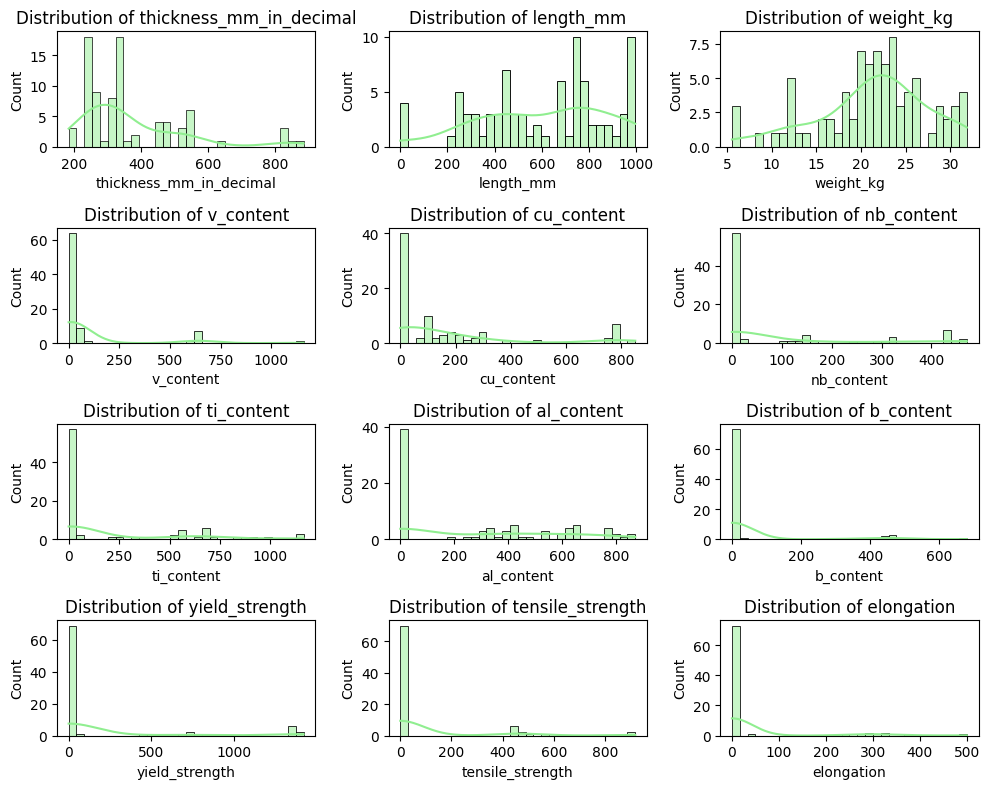

In [23]:
# Histograms for numerical columns in supplierdf1 by adjusting number of rows based on the number of columns

numerical_columns_supplier1 = supplierdf1.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of subplots needed
num_columns = len(numerical_columns_supplier1)
num_rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0) 
plt.figure(figsize=(10, 8))
for i, column in enumerate(numerical_columns_supplier1, 1):
    plt.subplot(num_rows, 3, i)  
    sns.histplot(supplierdf1[column], kde=True, bins=30, color='lightgreen')
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

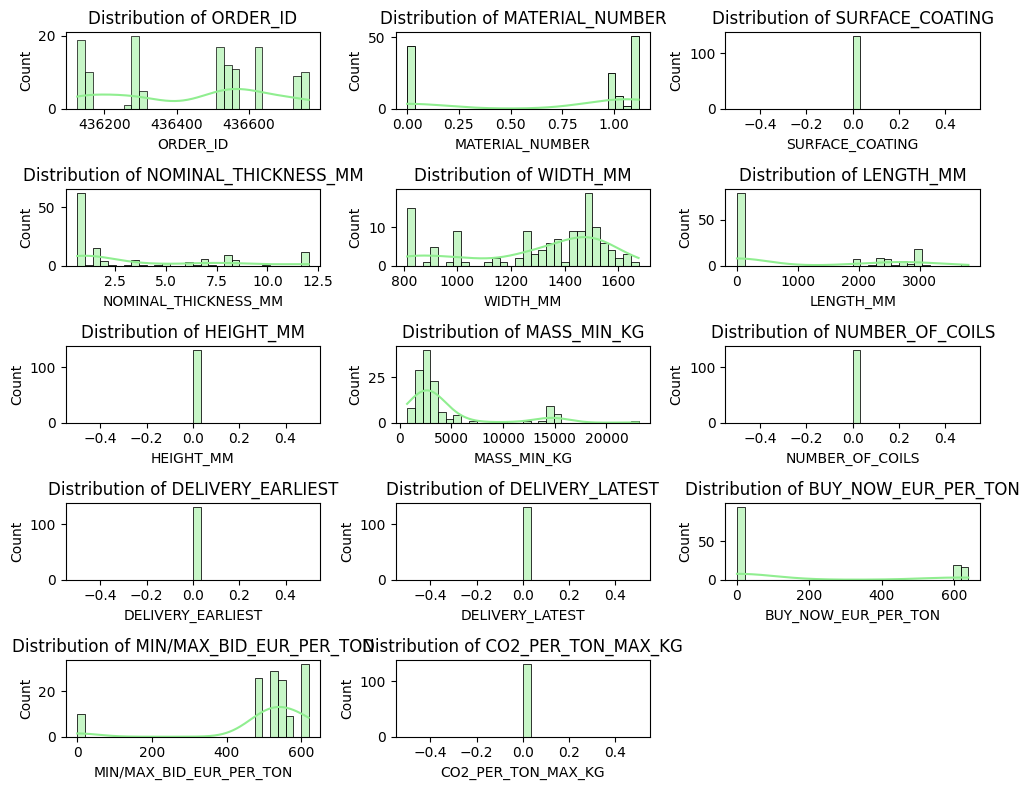

In [24]:
#Histograms for numerical columns in supplierdf2 by adjusting number of rows based on the number of columns
numerical_columns_supplier2 = supplierdf2.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of subplots needed for supplierdf2
num_columns_supplier2 = len(numerical_columns_supplier2)
num_rows_supplier2 = (num_columns_supplier2 // 3) + (1 if num_columns_supplier2 % 3 != 0 else 0)  

plt.figure(figsize=(10, 8))
for i, column in enumerate(numerical_columns_supplier2, 1):
    plt.subplot(num_rows_supplier2, 3, i)  
    sns.histplot(supplierdf2[column], kde=True, bins=30, color='lightgreen')
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

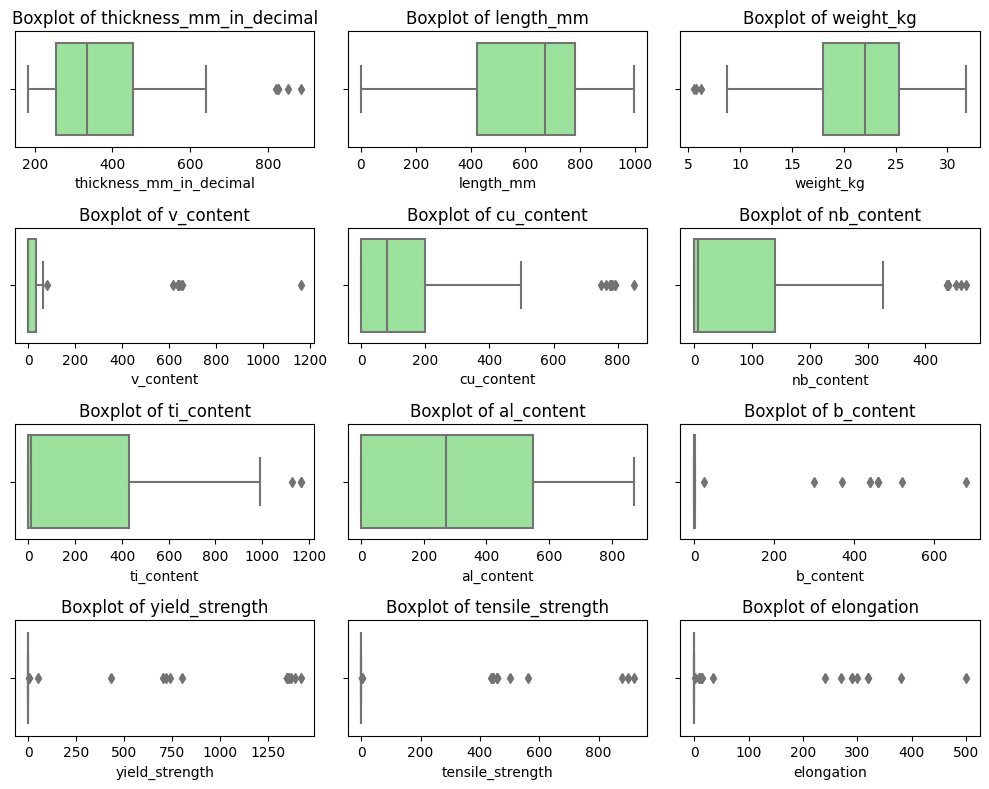

In [25]:
# Boxplots for numerical columns in supplierdf1 by adjusting columns and rows
numerical_columns_supplier1 = supplierdf1.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of subplots needed
num_columns = len(numerical_columns_supplier1)
num_rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)  

plt.figure(figsize=(10, 8))
for i, column in enumerate(numerical_columns_supplier1, 1):
    plt.subplot(num_rows, 3, i)  
    sns.boxplot(x=supplierdf1[column], color='lightgreen')
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

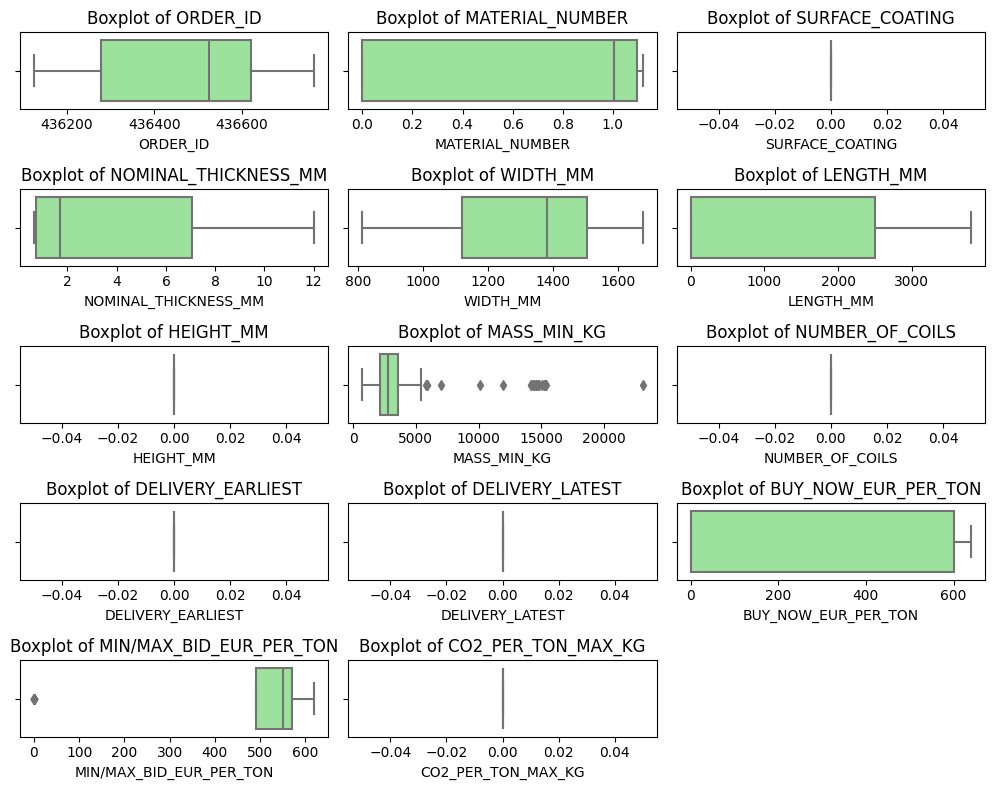

In [26]:
# Boxplots for numerical columns in supplierdf2 by adjusting rows and columns
numerical_columns_supplier2 = supplierdf2.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of subplots needed for supplierdf2
num_columns_supplier2 = len(numerical_columns_supplier2)
num_rows_supplier2 = (num_columns_supplier2 // 3) + (1 if num_columns_supplier2 % 3 != 0 else 0)  

plt.figure(figsize=(10, 8))
for i, column in enumerate(numerical_columns_supplier2, 1):
    plt.subplot(num_rows_supplier2, 3, i)  
    sns.boxplot(x=supplierdf2[column], color='lightgreen')
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()

plt.show()

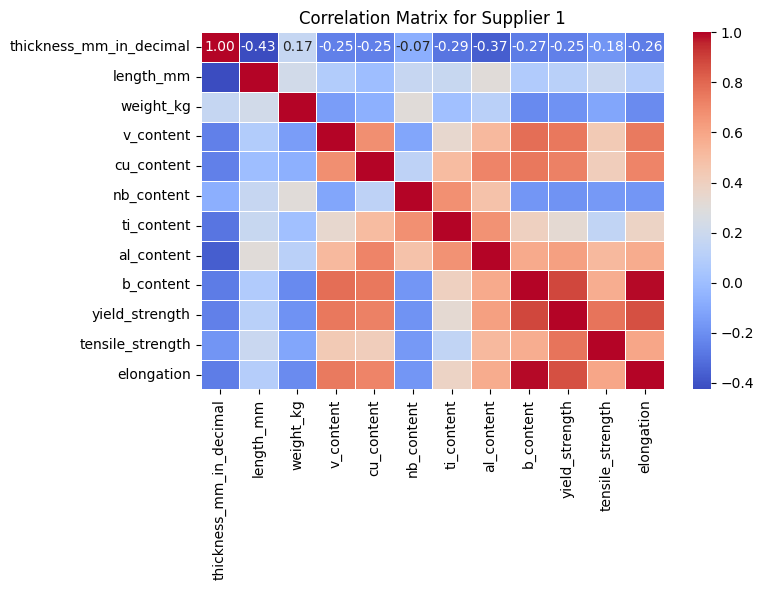

In [27]:
#Correlation Matrix: Heatmap
# For numeric columns from supplierdf1
numerical_columns_supplier1 = supplierdf1.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the numeric columns
correlation_supplier1 = supplierdf1[numerical_columns_supplier1].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_supplier1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Supplier 1")
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


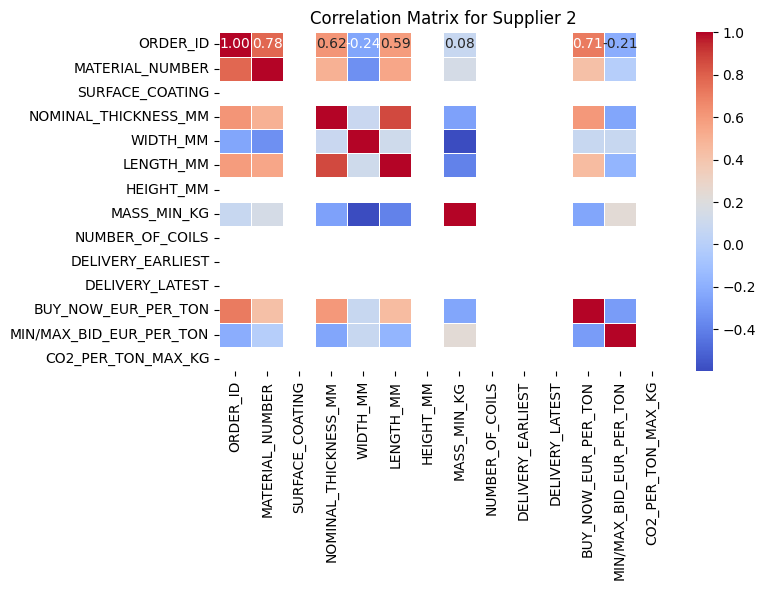

In [28]:
# For numeric columns from supplierdf2
numerical_columns_supplier2 = supplierdf2.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the numeric columns
correlation_supplier2 = supplierdf2[numerical_columns_supplier2].corr()

# Plot the heatmap for supplierdf2
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_supplier2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Supplier 2")
plt.tight_layout()
plt.show()

In [29]:
# Grouped statistics based on categorical columns
# Select only numeric columns from supplierdf1
numerical_columns_supplier1 = supplierdf1.select_dtypes(include=['float64', 'int64']).columns

# Group by 'grade' and calculate mean for numerical columns
supplierdf1_grouped = supplierdf1.groupby('grade')[numerical_columns_supplier1].mean()

# Display the result
print("\nSupplier 1 - Grouped Statistics by 'grade':")
print(supplierdf1_grouped)


Supplier 1 - Grouped Statistics by 'grade':
                 thickness_mm_in_decimal   length_mm  weight_kg   v_content  \
grade                                                                         
2A Lager                      246.750000  561.250000  14.687500  643.000000   
42CrMo4                       272.000000  923.000000  22.632000   26.000000   
50CrMo4                       482.333333  445.333333  22.706667    0.000000   
51CrV4                        826.500000  263.500000  22.060000    0.000000   
58CrV4                        562.000000  520.000000  23.170000  580.000000   
67CrNiMo33                    277.000000  900.500000  22.200000   10.000000   
C2WS8                         334.500000  577.500000  15.620000   25.000000   
CR210BH                       339.000000  676.000000  30.370000    0.000000   
CR300LA                       541.000000  244.000000  16.480000   10.000000   
CR330Y590T-DP                 332.000000  836.000000  21.060000   30.000000   
CR340LA

In [30]:
# Double-check missing values and duplicates after cleaning
print("\nMissing Values After Cleaning (Supplier 1):")
print(supplierdf1.isna().sum())

print("\nMissing Values After Cleaning (Supplier 2):")
print(supplierdf2.isna().sum())

# Check duplicates in the cleaned datasets
duplicates_supplier1 = supplierdf1.duplicated().sum()
duplicates_supplier2 = supplierdf2.duplicated().sum()

print(f"\nDuplicates in Supplier 1 (after cleaning): {duplicates_supplier1}")
print(f"Duplicates in Supplier 2 (after cleaning): {duplicates_supplier2}")


Missing Values After Cleaning (Supplier 1):
quality_choice             0
grade                      0
thickness_mm_in_decimal    0
width_mm                   0
length_mm                  0
weight_kg                  0
cluster                    0
si_content                 0
mn_content                 0
p_content                  0
s_content                  0
cr_content                 0
ni_content                 0
mo_content                 0
v_content                  0
cu_content                 0
nb_content                 0
ti_content                 0
al_content                 0
b_content                  0
yield_strength             0
tensile_strength           0
elongation                 0
dtype: int64

Missing Values After Cleaning (Supplier 2):
PRODUCT_TYPE               0
ORDER_ID                   0
SITE                       0
MATERIAL_NAME              0
MATERIAL_NUMBER            0
MATERIAL_QUALITY_NORM      0
SURFACE_COATING            0
DEFECT_NOTES               

# 6. Data Mapping and Merging
This section focuses on standardizing the columns from both datasets, merging them into a unified inventory dataset, and performing final cleaning steps.
1. **Standardizing Columns for Merging:** Both datasets have different column names and structures. To create a unified `inventory_dataset`, only core overlapping fields were selected and renamed into a common schema.
2. **Mapped columns from both datasets to a common schema:** Added a `supplier_id` column to distinguish between the two suppliers, This helps identify the data's origin (which supplier provided each row), important for traceability. Merged the datasets using `pd.concat()` which combines both standardized datasets into one consolidated inventory dataset.
3. **Why only these columns:** These columns are the most critical to track physical attributes and quality information across both suppliers. Columns are renamed for uniformity, to allow merging into a single table.

In [31]:
#mapping the columns to create inventory_datasets out of supplier 1 and supplier 2 columns
df_1_mapped = pd.DataFrame({
    'Quality': supplierdf1['quality_choice'],
    'Material_grade': supplierdf1['grade'],
    'Material_thickness': supplierdf1['thickness_mm_in_decimal'],
    'Material_width': supplierdf1['width_mm'],
    'Material_length': supplierdf1['length_mm'],
    'Material_weight': supplierdf1['weight_kg']
})

df_2_mapped = pd.DataFrame({
    'Material_Name': supplierdf2['MATERIAL_NAME'],
    'Material_Quality_Norm': supplierdf2['MATERIAL_QUALITY_NORM'],
    'Material_thickness': supplierdf2['NOMINAL_THICKNESS_MM'],
    'Material_width': supplierdf2['WIDTH_MM'],
    'Material_length': supplierdf2['LENGTH_MM'],
    'Material_weight': supplierdf2['MASS_MIN_KG']
})

df_1_mapped['supplier_id'] = 'Id1'  # Indicates data comes from df_1 (Supplier 1)
df_2_mapped['supplier_id'] = 'Id2'  # Indicates data comes from df_2 (Supplier 2)

In [32]:
# For df_1_mapped
df_1_mapped = df_1_mapped[['supplier_id', 'Quality', 'Material_grade', 'Material_thickness', 'Material_width', 'Material_length', 'Material_weight']]

# For df_2_mapped
df_2_mapped = df_2_mapped[['supplier_id', 'Material_Name', 'Material_Quality_Norm', 'Material_thickness', 'Material_width', 'Material_length', 'Material_weight']]

In [33]:
#concating two dfs for inventory_dataset
inventory_dataset = pd.concat([df_1_mapped, df_2_mapped], axis=0, ignore_index=True)

In [34]:
inventory_dataset

,supplier_id,Quality,Material_grade,Material_thickness,Material_width,Material_length,Material_weight,Material_Name,Material_Quality_Norm
0,Id1,G2UB5,SZBS800,320.000,856.0,787.0,16.490,NaN,NaN
1,Id1,G2UJ5,SZBS800,339.000,918.0,707.0,17.160,NaN,NaN
2,Id1,C3318,LICRO 500,452.000,"1,839.0",300.0,18.700,NaN,NaN
3,Id1,C3U15,S380MC mod. 4,532.000,"1,160.0",461.0,22.011,NaN,NaN
4,Id1,G3UB5,SZBE800,451.000,727.2,557.0,14.020,NaN,NaN
...,...,...,...,...,...,...,...,...,...
209,Id2,NaN,NaN,0.809,871.0,0.0,2811.000,CR180BH,NA
210,Id2,NaN,NaN,0.713,1418.0,0.0,2930.000,CR5,VDA 239-100
211,Id2,NaN,NaN,2.209,1130.0,0.0,5780.000,DIVERSE,-
212,Id2,NaN,NaN,0.696,1282.0,0.0,11960.000,HC180B,DIN EN 10268


In [35]:
inventory_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   supplier_id            214 non-null    object 
 1   Quality                83 non-null     object 
 2   Material_grade         83 non-null     object 
 3   Material_thickness     214 non-null    float64
 4   Material_width         214 non-null    object 
 5   Material_length        214 non-null    float64
 6   Material_weight        214 non-null    float64
 7   Material_Name          131 non-null    object 
 8   Material_Quality_Norm  131 non-null    object 
dtypes: float64(3), object(6)
memory usage: 15.2+ KB


# 7. Final Missing Value and Handling Datatypes (Merged Dataset)
To handle any residual missing values after merging, ensuring the dataset is fully clean.
1. Converting Material_width to Numeric:The Material_width column may contain commas (e.g., 1,000), which need to be removed for proper conversion to a numeric type.
2. We fill missing values in specific columns to ensure data consistency.
3. We check for and remove duplicate rows in the merged dataset.
4. Finally, we save the cleaned and merged dataset to an Excel file for future use.

In [36]:
#converting 'Material_width' column from object to float for consistency
inventory_dataset['Material_width'] = inventory_dataset['Material_width'].replace({',': ''}, regex=True)
inventory_dataset['Material_width'] = pd.to_numeric(inventory_dataset['Material_width'], errors='coerce')
print(f"Data type of 'Material_width' after conversion: {inventory_dataset['Material_width'].dtype}")

Data type of 'Material_width' after conversion: float64


In [37]:
nan_values = inventory_dataset[inventory_dataset['Material_width'].isna()]
print(f"Rows with NaN in 'Material_width' after conversion:\n{nan_values}")

Rows with NaN in 'Material_width' after conversion:
Empty DataFrame
Columns: [supplier_id, Quality, Material_grade, Material_thickness, Material_width, Material_length, Material_weight, Material_Name, Material_Quality_Norm]
Index: []


In [38]:
#filling all null values
#List of columns to replace missing values
columns_to_fill_ = ['Quality', 'Material_grade', 'Material_Name', 'Material_Quality_Norm']

# Replace missing values with 'NA' in the specified columns
inventory_dataset[columns_to_fill_] = inventory_dataset[columns_to_fill_].fillna('NA')

In [39]:
#verifying missing values
inventory_dataset.isna().sum()

supplier_id              0
Quality                  0
Material_grade           0
Material_thickness       0
Material_width           0
Material_length          0
Material_weight          0
Material_Name            0
Material_Quality_Norm    0
dtype: int64

In [40]:
#Check duplicates
full_duplicates = inventory_dataset[inventory_dataset.duplicated(keep=False)]
print(f"Total Full Duplicate Rows: {full_duplicates.shape[0]}")
if not full_duplicates.empty:
     print(full_duplicates)

Total Full Duplicate Rows: 7
    supplier_id Quality Material_grade  Material_thickness  Material_width  \
109         Id2      NA             NA              12.008          1508.0   
111         Id2      NA             NA              12.008          1508.0   
114         Id2      NA             NA              12.029          1503.0   
118         Id2      NA             NA              12.029          1503.0   
137         Id2      NA             NA               8.383          1250.0   
143         Id2      NA             NA               8.383          1250.0   
158         Id2      NA             NA               8.383          1250.0   

     Material_length  Material_weight Material_Name Material_Quality_Norm  
109           2506.0           3551.0        S355JR          DIN EN 10025  
111           2506.0           3551.0        S355JR          DIN EN 10025  
114           3008.0           2131.0        S355JR          DIN EN 10025  
118           3008.0           2131.0     

In [41]:
# Remove full duplicates (keeping the first one)
inventory_dataset = inventory_dataset.drop_duplicates(keep='first')

# Verify that the duplicates are removed
print(f"Total rows after removing full duplicates: {inventory_dataset.shape[0]}")

# Save the cleaned dataset to an Excel file
inventory_dataset.to_excel('cleaned_inventory_dataset.xlsx', index=False)

Total rows after removing full duplicates: 210


In [43]:
inventory_dataset

,supplier_id,Quality,Material_grade,Material_thickness,Material_width,Material_length,Material_weight,Material_Name,Material_Quality_Norm
0,Id1,G2UB5,SZBS800,320.000,856.0,787.0,16.490,NA,NA
1,Id1,G2UJ5,SZBS800,339.000,918.0,707.0,17.160,NA,NA
2,Id1,C3318,LICRO 500,452.000,1839.0,300.0,18.700,NA,NA
3,Id1,C3U15,S380MC mod. 4,532.000,1160.0,461.0,22.011,NA,NA
4,Id1,G3UB5,SZBE800,451.000,727.2,557.0,14.020,NA,NA
...,...,...,...,...,...,...,...,...,...
209,Id2,NA,NA,0.809,871.0,0.0,2811.000,CR180BH,NA
210,Id2,NA,NA,0.713,1418.0,0.0,2930.000,CR5,VDA 239-100
211,Id2,NA,NA,2.209,1130.0,0.0,5780.000,DIVERSE,-
212,Id2,NA,NA,0.696,1282.0,0.0,11960.000,HC180B,DIN EN 10268


# 8. Adding Unused Columns as Comma-Separated Values (Renamed and Reordered) for no data loss.
In this section, we append the columns not used in the `inventory_dataset` from both suppliers into a single column named `additional_info_column`. This column contains comma-separated values of the unused columns and is placed as the last column in the `inventory_dataset_additonal`. We copy `nventory_dataset`and name it to `inventory_dataset_additional`.
1. **Identify Unused Columns**: Determine which columns from `supplierdf1` and `supplierdf2` were not included in the `inventory_dataset`.
2. **Combine Unused Columns**: For each row, combine the values of the unused columns into a single string with comma-separated values.
3. **Rename the Column**: Rename the combined column to `additional_info_column`.
4. **Add the Combined Column**: Append this combined column to the `inventory_dataset`.
5. **Reorder Columns**: Ensure `additional_info_column` is the last column in the `inventory_dataset`.

In [44]:
inventory_dataset_additional = inventory_dataset.copy()

In [45]:
# Step 1: Identify unused columns in Supplier 1
unused_columns_supplier1 = supplierdf1.columns.difference(df_1_mapped.columns)
print("Unused columns in Supplier 1:")
print(unused_columns_supplier1)

# Step 2: Combine unused columns into a single column for Supplier 1
supplierdf1['additional_info_column'] = supplierdf1[unused_columns_supplier1].apply(
    lambda row: ','.join(row.dropna().astype(str)), axis=1
)

# Step 3: Identify unused columns in Supplier 2
unused_columns_supplier2 = supplierdf2.columns.difference(df_2_mapped.columns)
print("\nUnused columns in Supplier 2:")
print(unused_columns_supplier2)

# Step 4: Combine unused columns into a single column for Supplier 2
supplierdf2['additional_info_column'] = supplierdf2[unused_columns_supplier2].apply(
    lambda row: ','.join(row.dropna().astype(str)), axis=1
)

# Step 5: Add the combined column to the inventory_dataset
# Map the 'additional_info_column' column to the inventory_dataset based on supplier_id
df_1_mapped['additional_info_column'] = supplierdf1['additional_info_column']
df_2_mapped['additional_info_column'] = supplierdf2['additional_info_column']

# Step 6: Merge the datasets with the new 'additional_info_column' column
inventory_dataset_additional = pd.concat([df_1_mapped, df_2_mapped], axis=0, ignore_index=True)

# Step 7: Ensure 'additional_info_column' is the last column
column_order = [col for col in inventory_dataset_additional.columns if col != 'additional_info_column'] + ['additional_info_column']
inventory_dataset_additional = inventory_dataset_additional[column_order]

# Step 8: Verify the result
print("\nInventory Dataset with 'additional_info_column' as the Last Column:")
print(inventory_dataset_additional.head())

Unused columns in Supplier 1:
Index(['al_content', 'b_content', 'cluster', 'cr_content', 'cu_content',
       'elongation', 'grade', 'length_mm', 'mn_content', 'mo_content',
       'nb_content', 'ni_content', 'p_content', 'quality_choice', 's_content',
       'si_content', 'tensile_strength', 'thickness_mm_in_decimal',
       'ti_content', 'v_content', 'weight_kg', 'width_mm', 'yield_strength'],
      dtype='object')

Unused columns in Supplier 2:
Index(['BUY_NOW_EUR_PER_TON', 'CO2_PER_TON_MAX_KG', 'DEFECT_NOTES',
       'DELIVERY_EARLIEST', 'DELIVERY_LATEST', 'HEIGHT_MM', 'INCO_TERM',
       'LENGTH_MM', 'MASS_MIN_KG', 'MATERIAL_NAME', 'MATERIAL_NUMBER',
       'MATERIAL_QUALITY_NORM', 'MIN/MAX_BID_EUR_PER_TON',
       'NOMINAL_THICKNESS_MM', 'NUMBER_OF_COILS', 'ORDER_ID', 'PRODUCT_TYPE',
       'SITE', 'SURFACE_COATING', 'VALID_UNTIL', 'WIDTH_MM'],
      dtype='object')

Inventory Dataset with 'additional_info_column' as the Last Column:
  supplier_id Quality Material_grade  Material

In [46]:
inventory_dataset_additional

,supplier_id,Quality,Material_grade,Material_thickness,Material_width,Material_length,Material_weight,Material_Name,Material_Quality_Norm,additional_info_column
0,Id1,G2UB5,SZBS800,320.000,856.0,787.0,16.490,NaN,NaN,"0.0,0.0,WB-G,0.0,0.0,0.0,SZBS800,787.0,0.0,0.0..."
1,Id1,G2UJ5,SZBS800,339.000,918.0,707.0,17.160,NaN,NaN,"0.0,0.0,WB-G,0.0,0.0,0.0,SZBS800,707.0,0.0,0.0..."
2,Id1,C3318,LICRO 500,452.000,"1,839.0",300.0,18.700,NaN,NaN,"320.0,25.0,WB-U,0.4340,290.0,0.0,LICRO 500,300..."
3,Id1,C3U15,S380MC mod. 4,532.000,"1,160.0",461.0,22.011,NaN,NaN,"430.0,1.0,WB-U,0.0480,150.0,0.0,S380MC mod. 4,..."
4,Id1,G3UB5,SZBE800,451.000,727.2,557.0,14.020,NaN,NaN,"0.0,0.0,Spaltband,0.0,0.0,0.0,SZBE800,557.0,0...."
...,...,...,...,...,...,...,...,...,...,...
209,Id2,NaN,NaN,0.809,871.0,0.0,2811.000,CR180BH,NA,"0.0,0.0,CR180BHGI50/50-U Z 100 MB / D2A SUN,0..."
210,Id2,NaN,NaN,0.713,1418.0,0.0,2930.000,CR5,VDA 239-100,"0.0,0.0,CR5GI40/40-U Z 90 MB OL / D2A SAO,0.0..."
211,Id2,NaN,NaN,2.209,1130.0,0.0,5780.000,DIVERSE,-,"0.0,0.0,phs-uncoated 1500 CR / D2A KS,0.0,0.0..."
212,Id2,NaN,NaN,0.696,1282.0,0.0,11960.000,HC180B,DIN EN 10268,"0.0,0.0,NA,0.0,0.0,0.0,FCA,0.0,11960.0,HC180B,..."


In [ ]:
# Save the additonal dataset to an Excel file
inventory_dataset_additional.to_excel('inventory_dataset_additional.xlsx', index=False)